In [1]:
# No. of parameters vs. Generalization

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

/home/asifahm/.conda/envs/ece4420/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/asifahm/.conda/envs/ece4420/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [5]:
# Hyperparameters
input_size = 784  # MNIST image size (28x28) flattened
num_classes = 10  # Number of output classes for MNIST (digits 0-9)
num_epochs = 20
batch_size = 64
learning_rate = 0.001

In [6]:
# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
class DNN(nn.Module):
    def __init__(self, hidden_units):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_units[0])
        self.fc2 = nn.Linear(hidden_units[0], hidden_units[1])
        self.fc3 = nn.Linear(hidden_units[1], num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
# Training function
def train(model, optimizer, num_epochs):
    model.train()
    loss_list = []
    accuracy_list = []
    for epoch in range(num_epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            # Forward pass
            output = model(data)
            loss = criterion(output, target)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Add loss for each batch to total loss for the epoch
            total_loss += loss.item()
            # Accuracy calculation
            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == target).sum().item()
            total_predictions += target.size(0)

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions
        loss_list.append(avg_loss)
        accuracy_list.append(accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

    return loss_list, accuracy_list

In [9]:
# Test function
def test(model, optimizer):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            total_loss += loss.item()

            # Accuracy calculation
            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == target).sum().item()
            total_predictions += target.size(0)

    avg_loss = total_loss / len(test_loader)
    accuracy = correct_predictions / total_predictions
    return avg_loss, accuracy

In [16]:
# Different model sizes
hidden_units_list = [
    [10, 5],
    [20, 10],
    [30, 15],
    [40, 20],
    [50, 25],
    [60, 30],
    [70, 35],
    [80, 40],
    [90, 45],
    [100, 50],
]

# Lists to store results
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
param_counts = []

# Criterion
criterion = nn.CrossEntropyLoss()

num_epochs = 5

# Train and test each model
for hidden_units in hidden_units_list:
    model = DNN(hidden_units).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    num_params = sum(p.numel() for p in model.parameters())
    print(f'Training model with {num_params} parameters...')
    param_counts.append(num_params)

    # Training
    train_loss, train_accuracy = train(model, optimizer, num_epochs)

    # Testing
    test_loss, test_accuracy = test(model, optimizer)

    # Store results
    train_losses.append(train_loss[-1])  # Take the last epoch's loss
    train_accuracies.append(train_accuracy[-1])  # Take the last epoch's accuracy
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Training model with 7965 parameters...
Epoch [1/5], Loss: 1.0264, Accuracy: 0.6781
Epoch [2/5], Loss: 0.5052, Accuracy: 0.8622
Epoch [3/5], Loss: 0.4262, Accuracy: 0.8849
Epoch [4/5], Loss: 0.3811, Accuracy: 0.8955
Epoch [5/5], Loss: 0.3522, Accuracy: 0.9030
Training model with 16020 parameters...
Epoch [1/5], Loss: 0.6125, Accuracy: 0.8142
Epoch [2/5], Loss: 0.2854, Accuracy: 0.9193
Epoch [3/5], Loss: 0.2417, Accuracy: 0.9314
Epoch [4/5], Loss: 0.2154, Accuracy: 0.9386
Epoch [5/5], Loss: 0.1957, Accuracy: 0.9436
Training model with 24175 parameters...
Epoch [1/5], Loss: 0.5065, Accuracy: 0.8581
Epoch [2/5], Loss: 0.2537, Accuracy: 0.9265
Epoch [3/5], Loss: 0.2089, Accuracy: 0.9390
Epoch [4/5], Loss: 0.1771, Accuracy: 0.9479
Epoch [5/5], Loss: 0.1560, Accuracy: 0.9538
Training model with 32430 parameters...
Epoch [1/5], Loss: 0.4595, Accuracy: 0.8731
Epoch [2/5], Loss: 0.2144, Accuracy: 0.9375
Epoch [3/5], Loss: 0.1701, Accuracy: 0.9508
Epoch [4/5], Loss: 0.1439, Accuracy: 0.9578
Epoch

In [17]:
print(f"train_losses: {len(train_losses)}")
print(f"test_losses: {len(test_losses)}")
print(f"param_counts: {param_counts}")

train_losses: 10
test_losses: 10
param_counts: [7965, 16020, 24175, 32430, 40785, 49240, 57795, 66450, 75205, 84060]


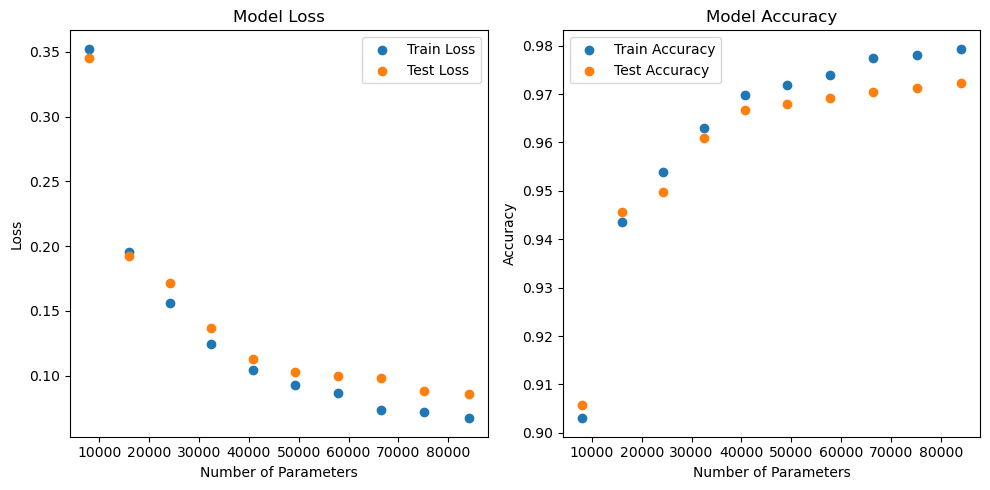

In [20]:
# Plot results
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.scatter(param_counts, train_losses, label='Train Loss')
plt.scatter(param_counts, test_losses, label='Test Loss')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.scatter(param_counts, train_accuracies, label='Train Accuracy')
plt.scatter(param_counts, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()